In [267]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

maze_image = Image.open('5x5.png')


In [268]:
# Converts image to a defaut tuple of RBG .convert() or greyscale .convert("L") or a Palletescale .convert("P")
# Greyscale averages the RBG tuple into a single number so its easier to work with
maze_image = maze_image.convert('P')


In [269]:
# resize image to fit scale of matrix
# Helps to convert some random scale of the image into a scale we can use
maze_image = maze_image.resize((5, 5))


In [270]:
# converts image to array

image_array = np.array(maze_image)

print(image_array)


[[1 1 0 0 2]
 [1 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 1 0]
 [3 1 0 0 0]]


In [271]:
#image_array = np.pad(image_array, pad_width=1, mode='constant', constant_values=1)
# print(image_array)


In [272]:
states = 25
actions = 4
state_action_table = np.zeros((states, actions))
print(state_action_table)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [273]:
def create_rewards_matrix(maze):
    rewards = np.full_like(maze, -1, dtype=int)
    for y, row in enumerate(maze):
        for x, cell in enumerate(row):
            if cell == 3:  # Charging station
                rewards[y][x] = 50
            elif cell == 1:  # Wall
                rewards[y][x] = -10
            elif cell == 2:  # Charging station
                rewards[y][x] = 0
    return rewards


x = create_rewards_matrix(image_array)
print(x)


[[-10 -10  -1  -1   0]
 [-10  -1  -1 -10  -1]
 [ -1  -1  -1 -10  -1]
 [ -1 -10  -1 -10  -1]
 [ 50 -10  -1  -1  -1]]


In [274]:
start_state = np.where(image_array == 2)
row_index = start_state[0][0]
column_index = start_state[1][0]
start_state = (row_index, column_index)
print(start_state)

end_state = np.where(image_array == 3)
row_index2 = end_state[0][0]
column_index2 = end_state[1][0]
end_state = (row_index2, column_index2)
print(end_state)




(0, 4)
(4, 0)


In [275]:

# Define the size of the environment
env_size = 5

# Initialize the Q-table with zeros
q_table = np.zeros((env_size, env_size, 4))

# Define the hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = 1
max_episodes = 200
env = image_array

# Define a function to get the next state and reward
def get_next_state_reward(state, action):
    # Determine the next state based on the action taken
    if action == 0: # up
        next_state = (max(state[0]-1,0), state[1])
    elif action == 1: # down
        next_state = (min(state[0]+1,env_size-1), state[1])
    elif action == 2: # left
        next_state = (state[0], max(state[1]-1,0))
    elif action == 3: # right
        next_state = (state[0], min(state[1]+1,env_size-1))
    
    # Determine the reward based on the next state
    if next_state == end_state: # goal state
        reward = 10.0
    if env[next_state[0]][next_state[1]] == 1:
        next_state = state  # stay in the same state
        reward = -5
    else: # all other states
        reward = -1
    
    return next_state, reward

# Define an epsilon-greedy policy
def epsilon_greedy_policy(state, q_table, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)
    else:
        action = np.argmax(q_table[state])
    return action

# Initialize a list to store episode rewards
episode_rewards = []

# Loop over episodes
for episode in range(max_episodes):
    # Initialize the starting state of the agent
    state = start_state
    
    # Initialize the episode reward
    episode_reward = 0.0
    
    # Loop over steps within each episode
    while True:
        # Choose an action using the epsilon-greedy policy
        action = epsilon_greedy_policy(state, q_table, epsilon)
        
        # Obtain the next state and reward
        next_state, reward = get_next_state_reward(state, action)
        
        # Update the Q-value of the current state-action pair
        q_table[state][action] = (1-alpha)*(q_table[state][action]) * (reward + gamma * np.max(q_table[next_state]))
        
        # Set the current state to the next state
        state = next_state
        
        # Add the reward obtained in the current step to the episode reward
        episode_reward += reward
        
        # Break out of the step loop if the agent reaches the goal state
        if state == end_state:
            break
        
    # Decrease the exploration rate
    epsilon *= 0.99
    
    # Append the episode reward to the episode_rewards list
    episode_rewards.append(episode_reward)

# Print the final Q-table
print("Q-Table: ")
print(q_table)

# Print the episode rewards
print("Episode Rewards:")
print(episode_rewards)



KeyboardInterrupt: 

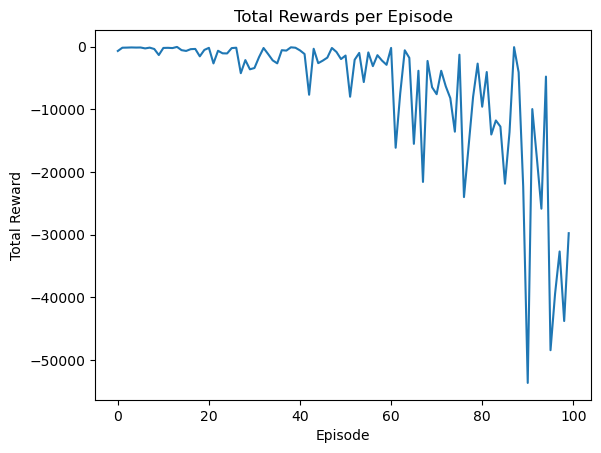

In [ ]:

plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
#plt.ylim(-40, 20)
plt.show()